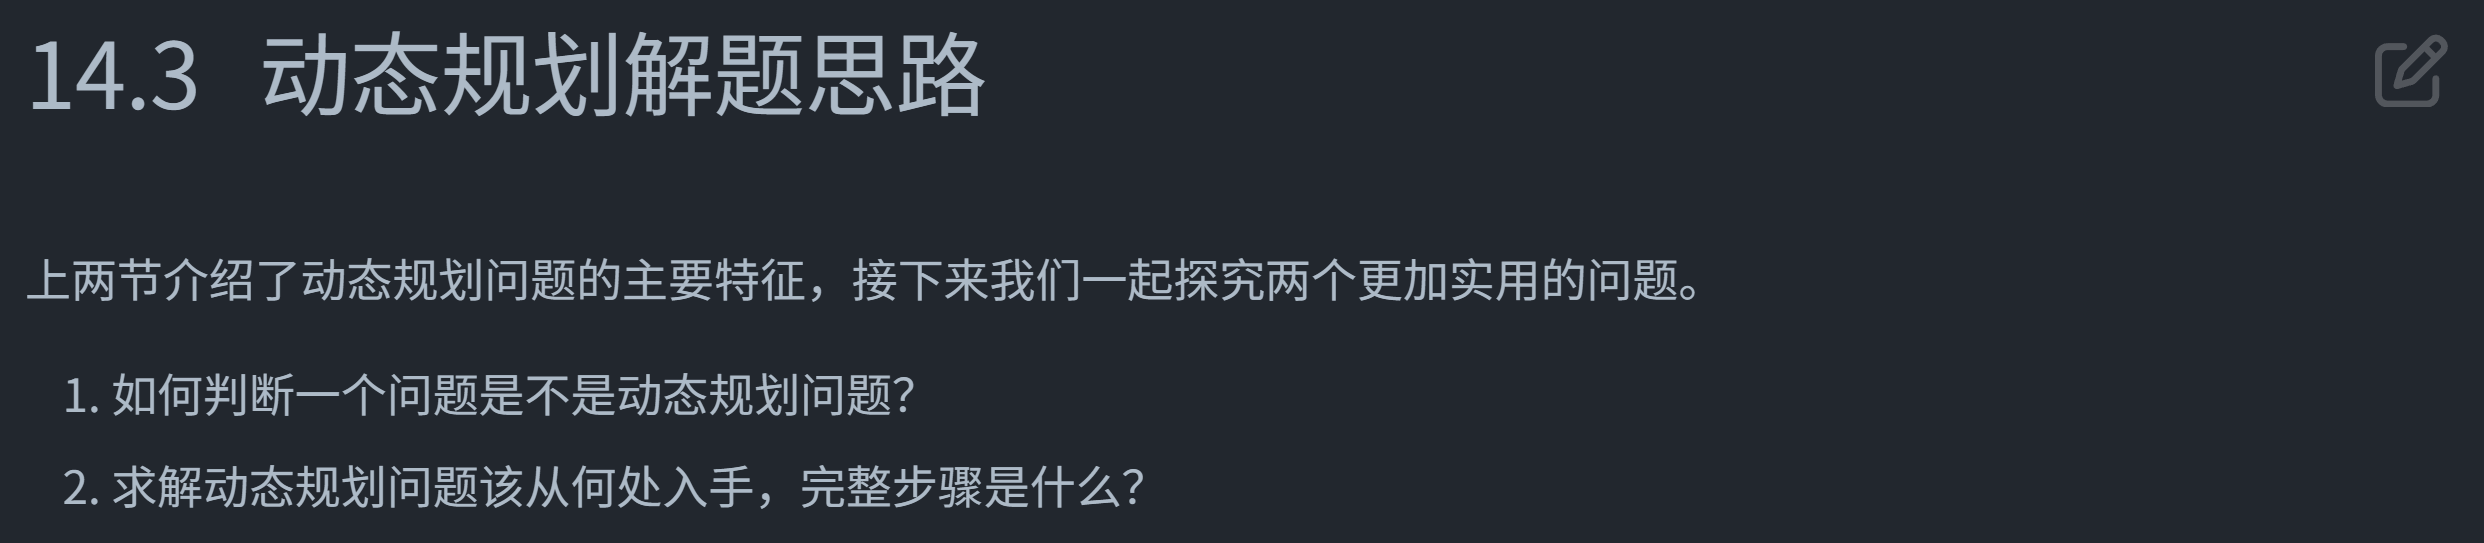
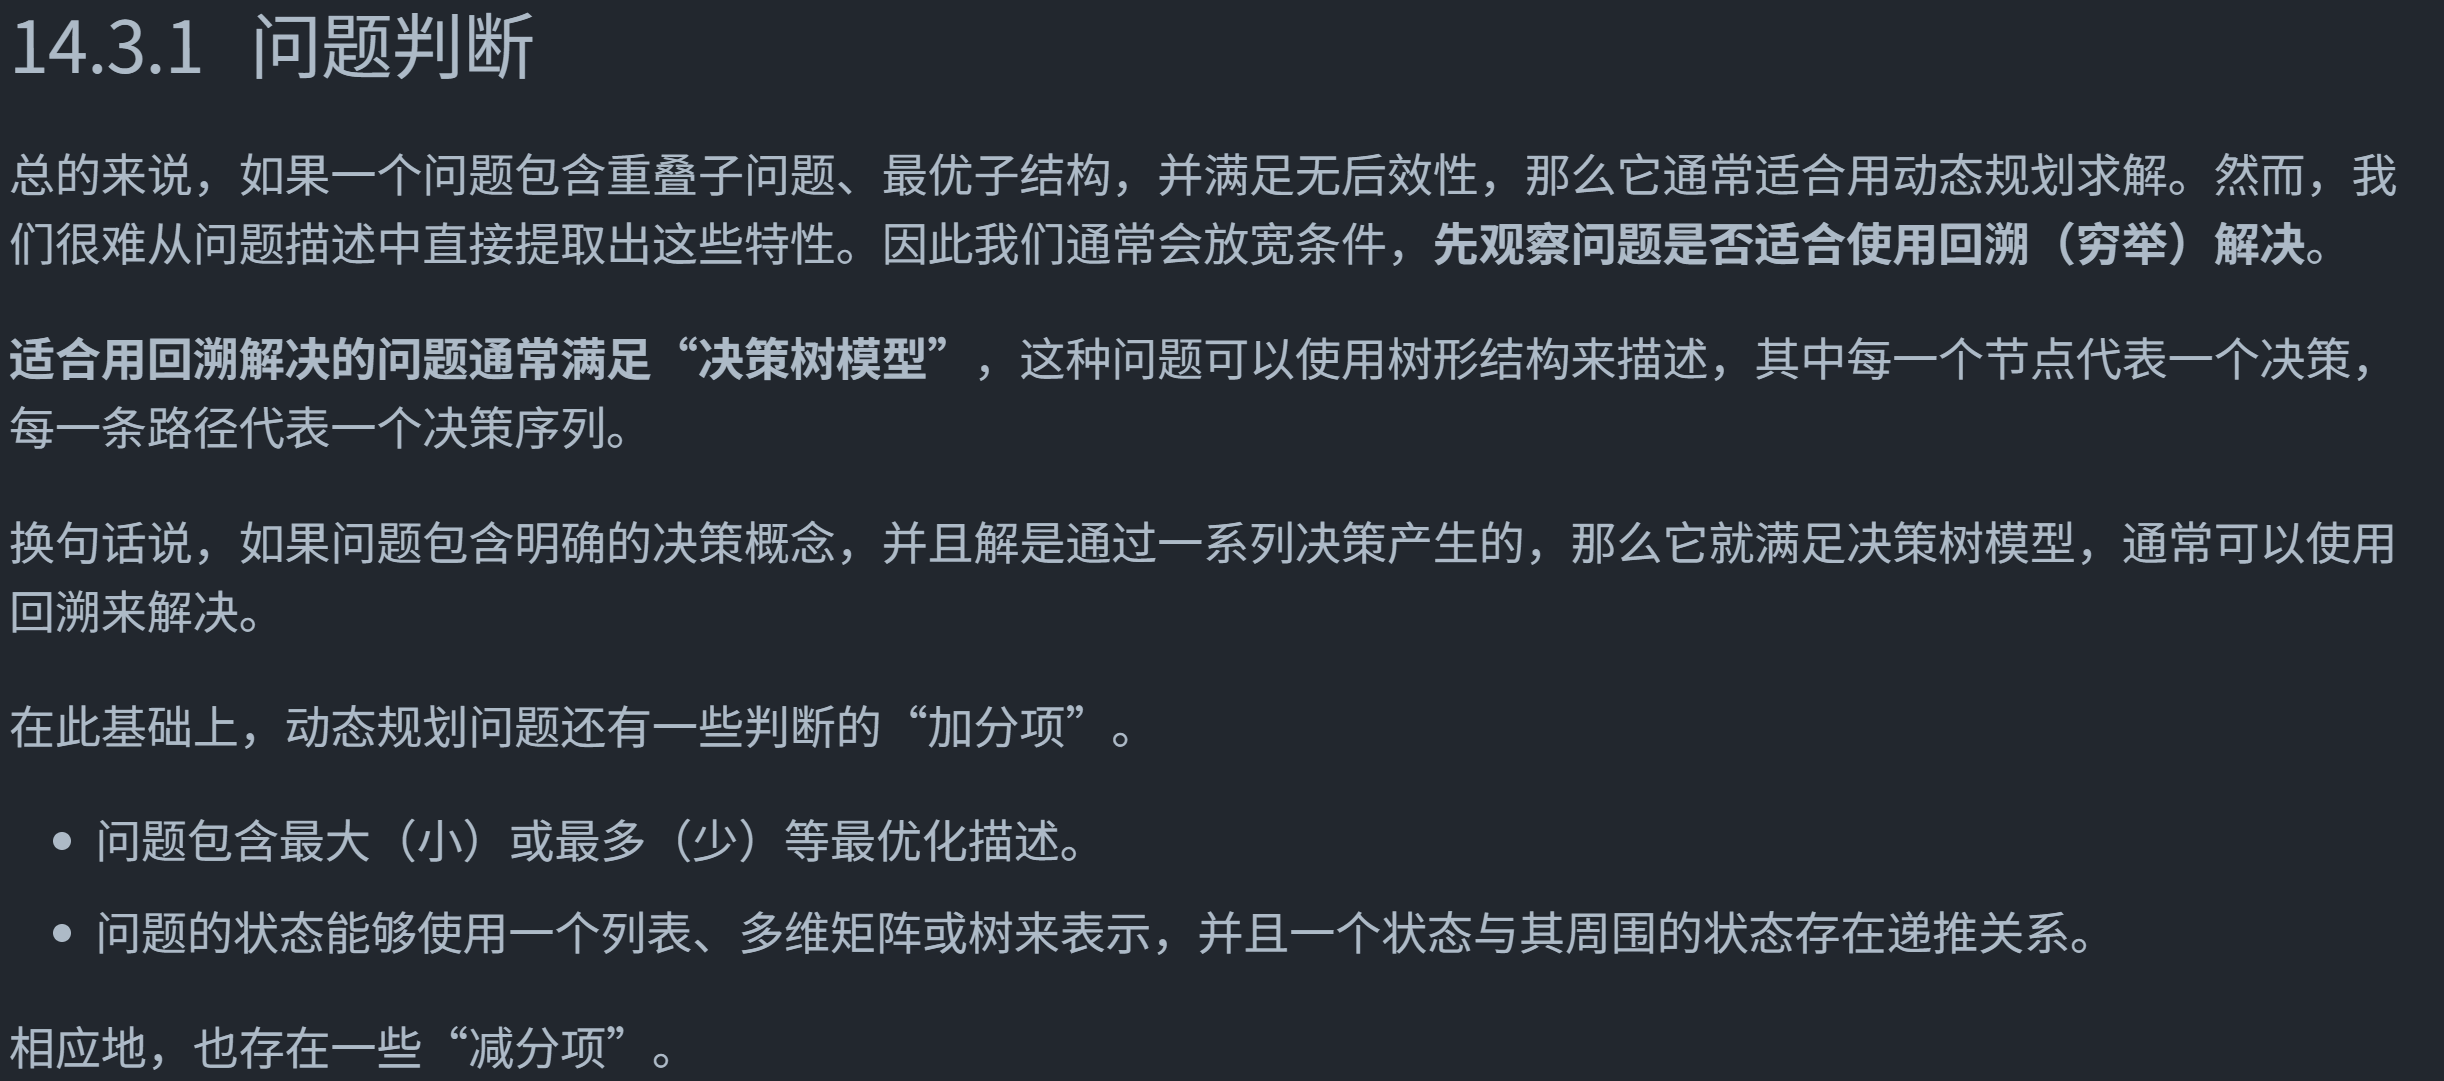
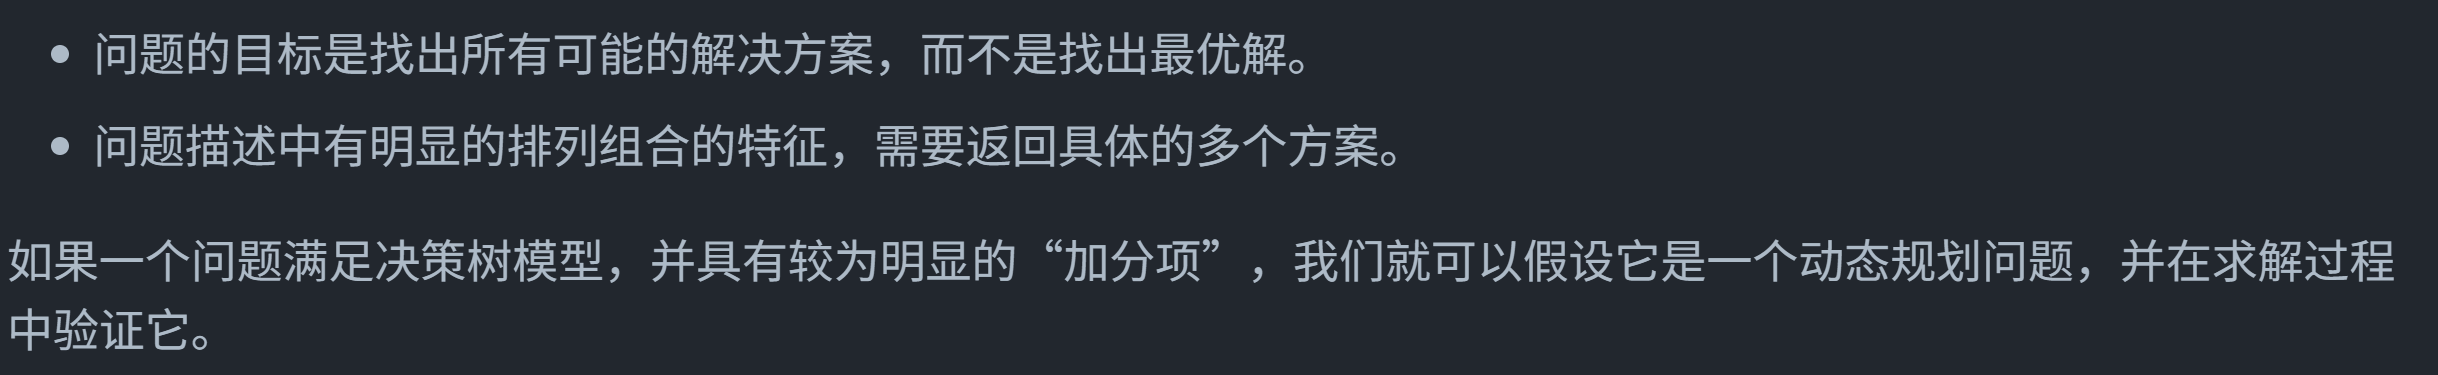
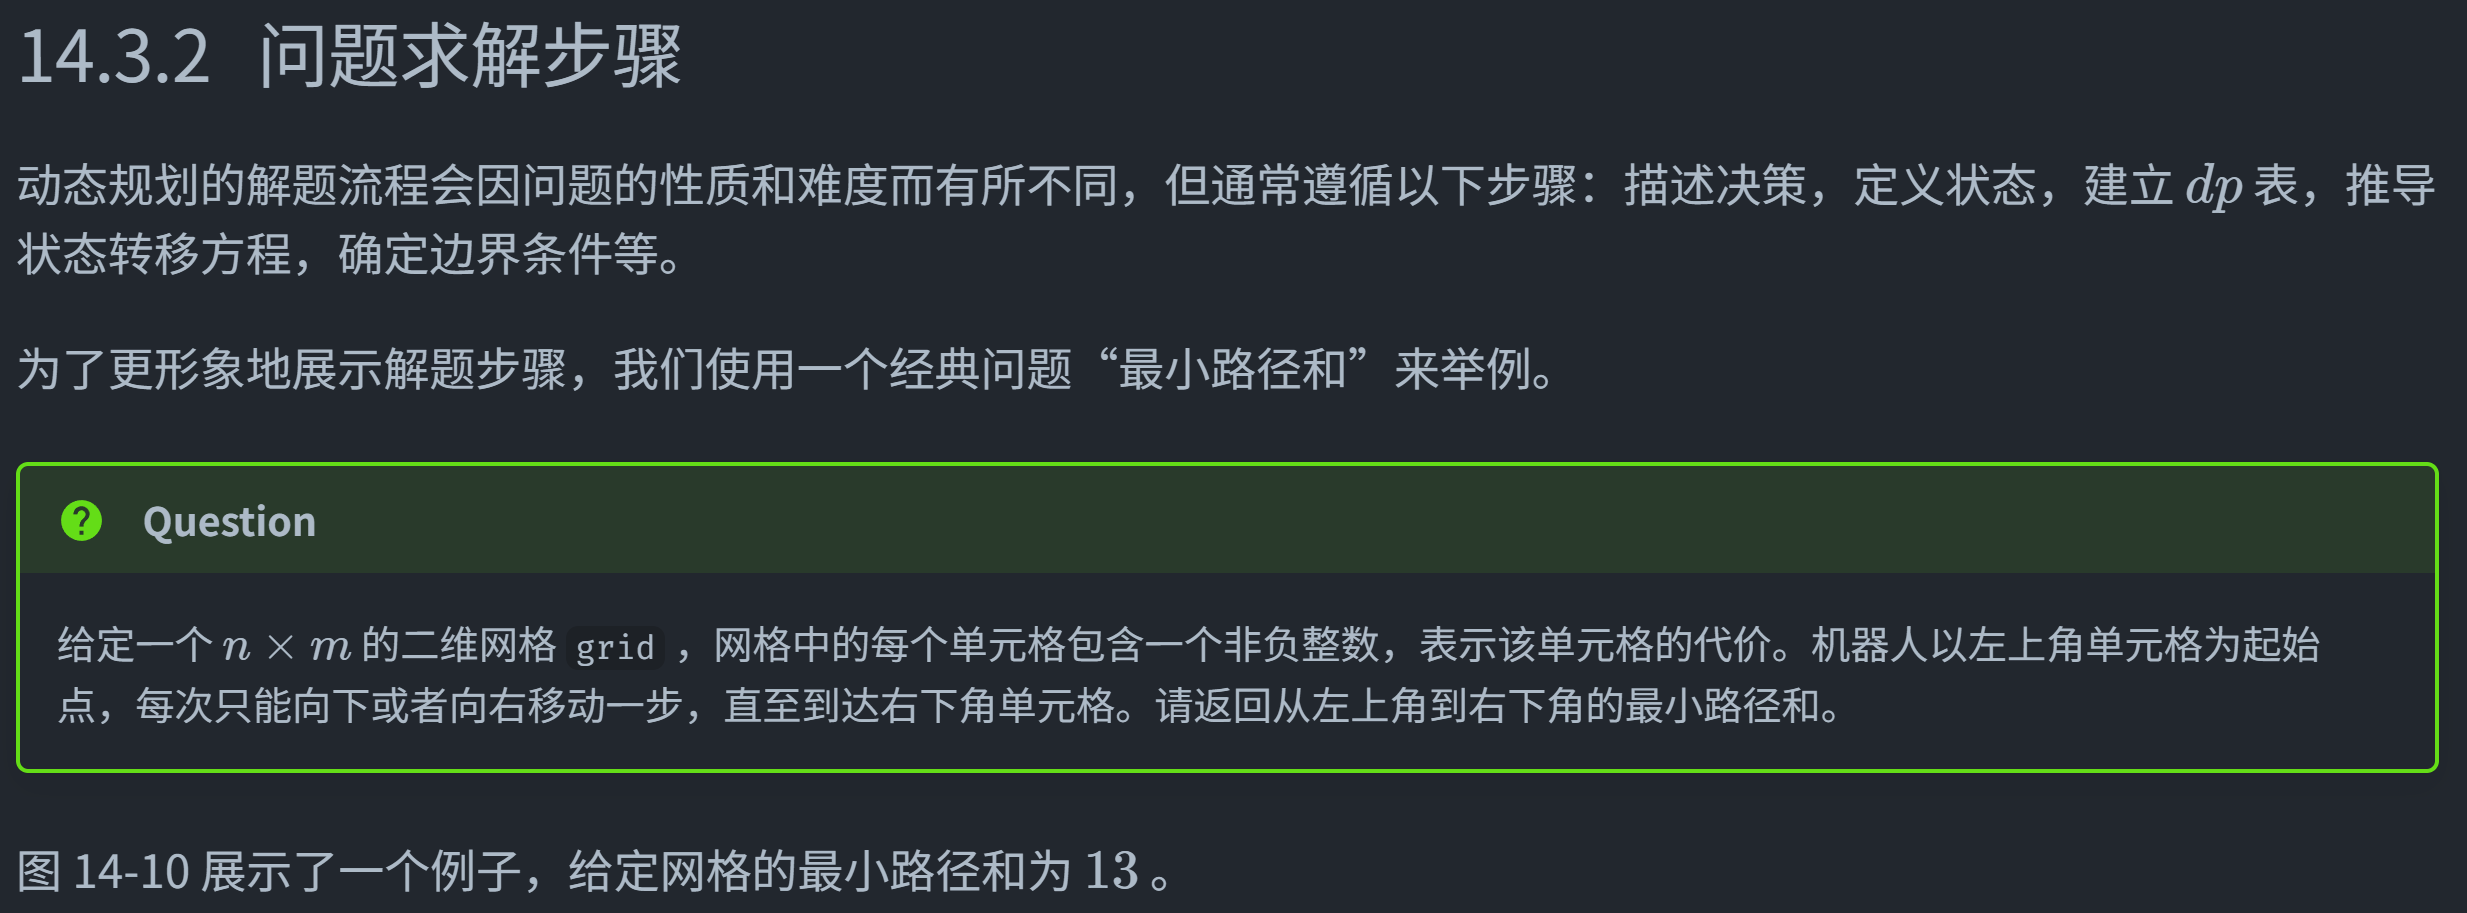
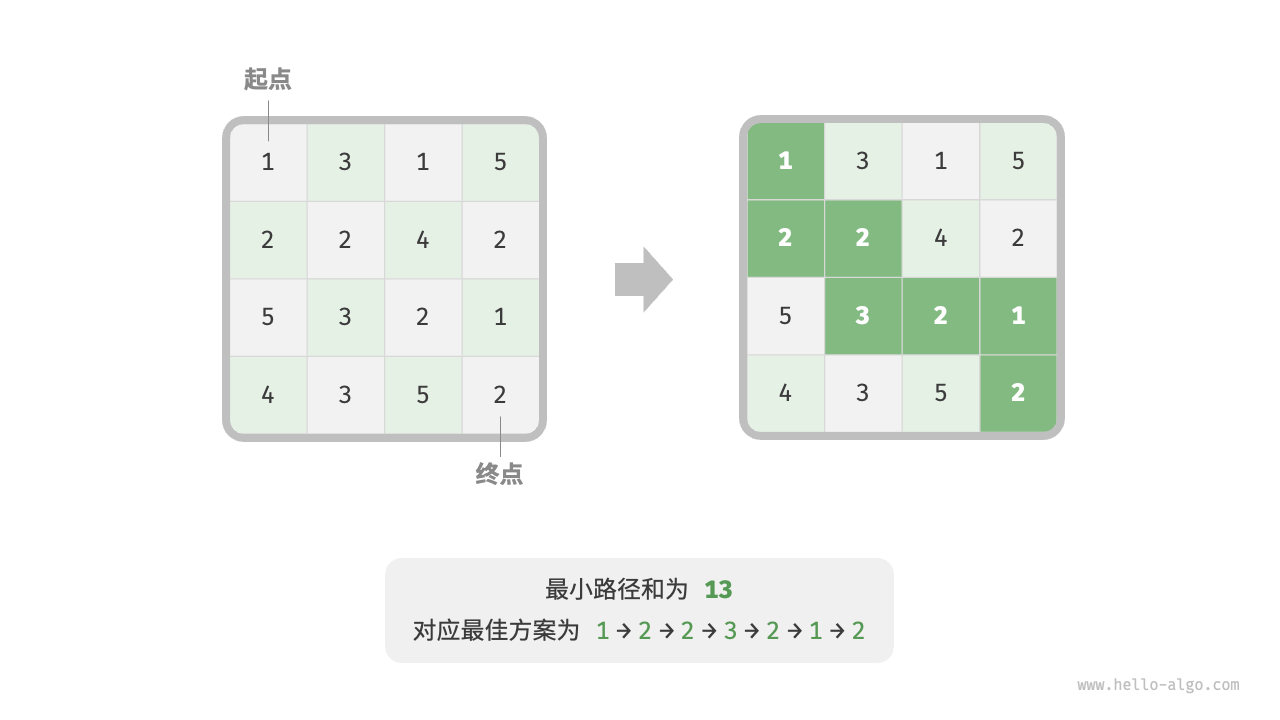
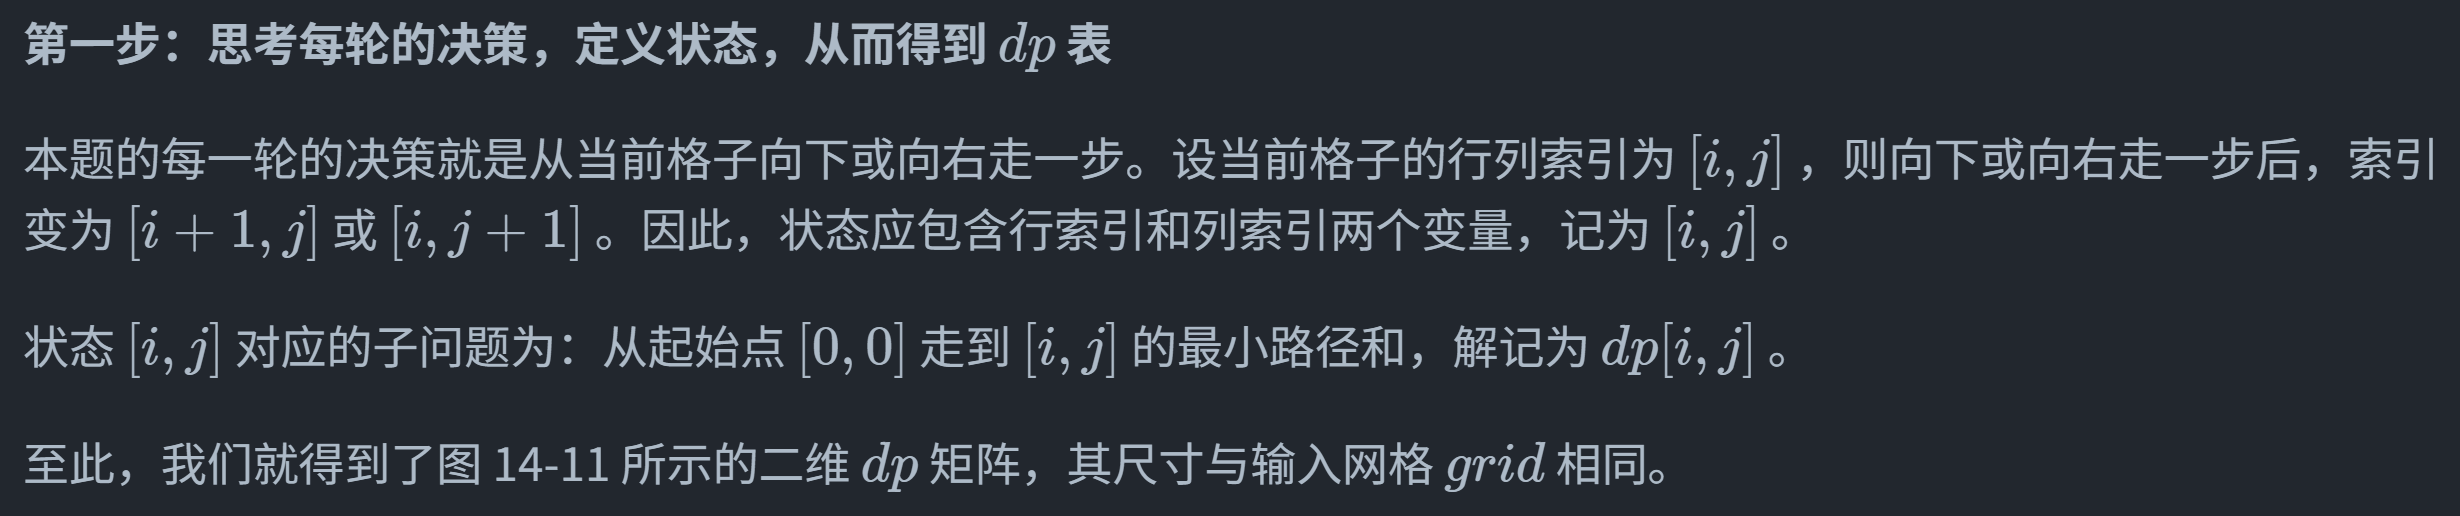
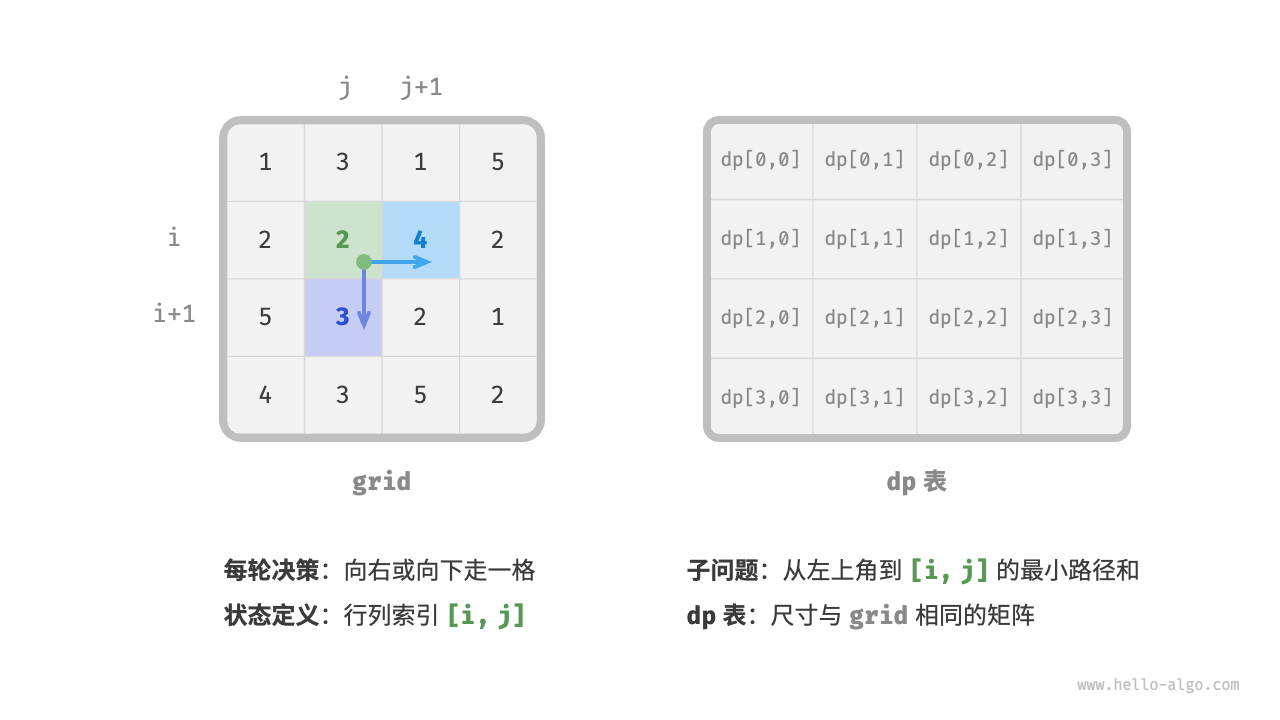
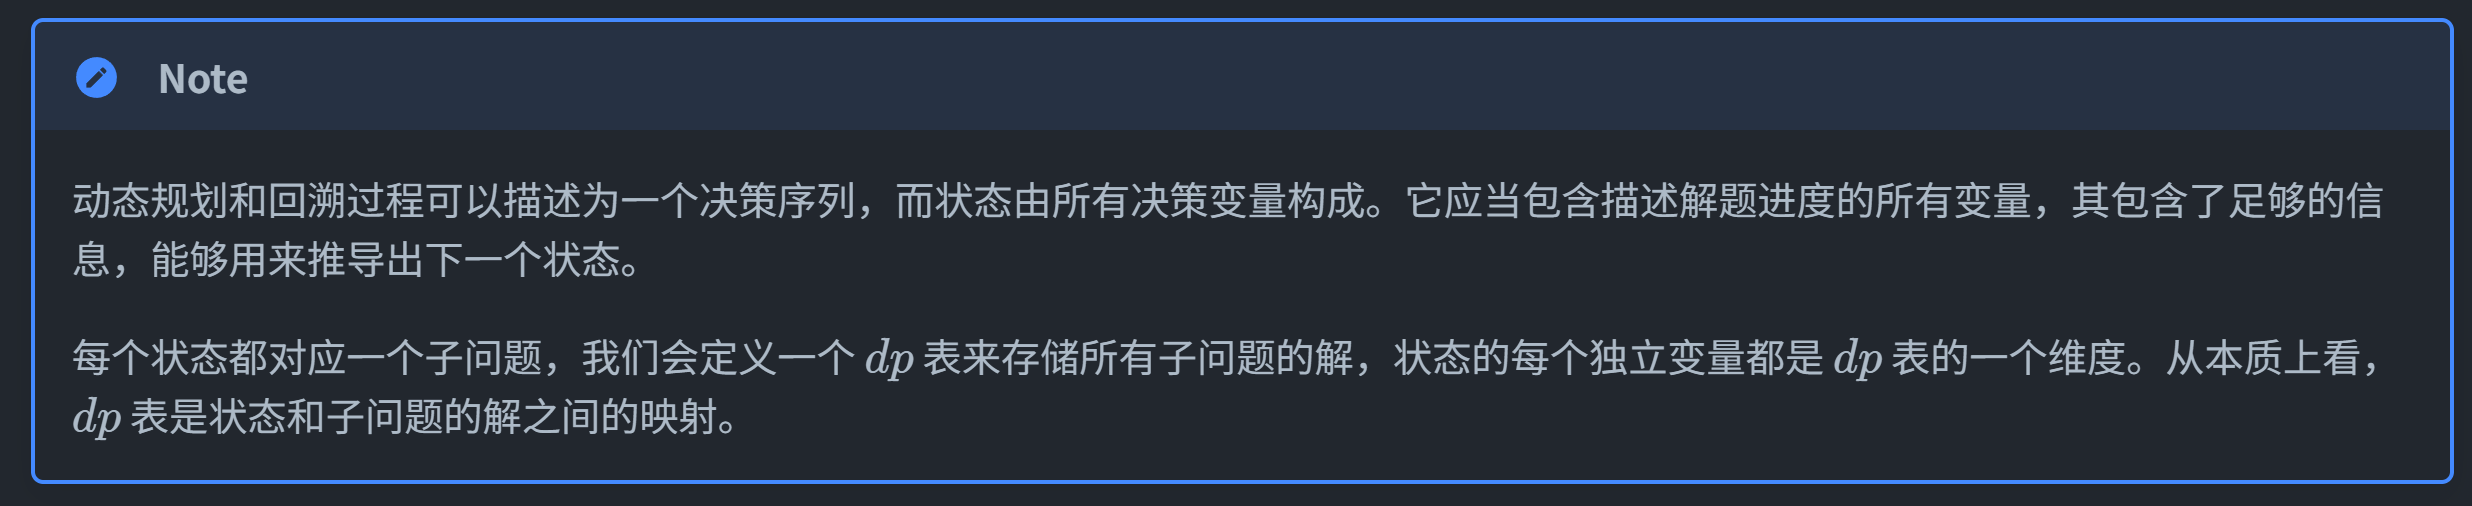
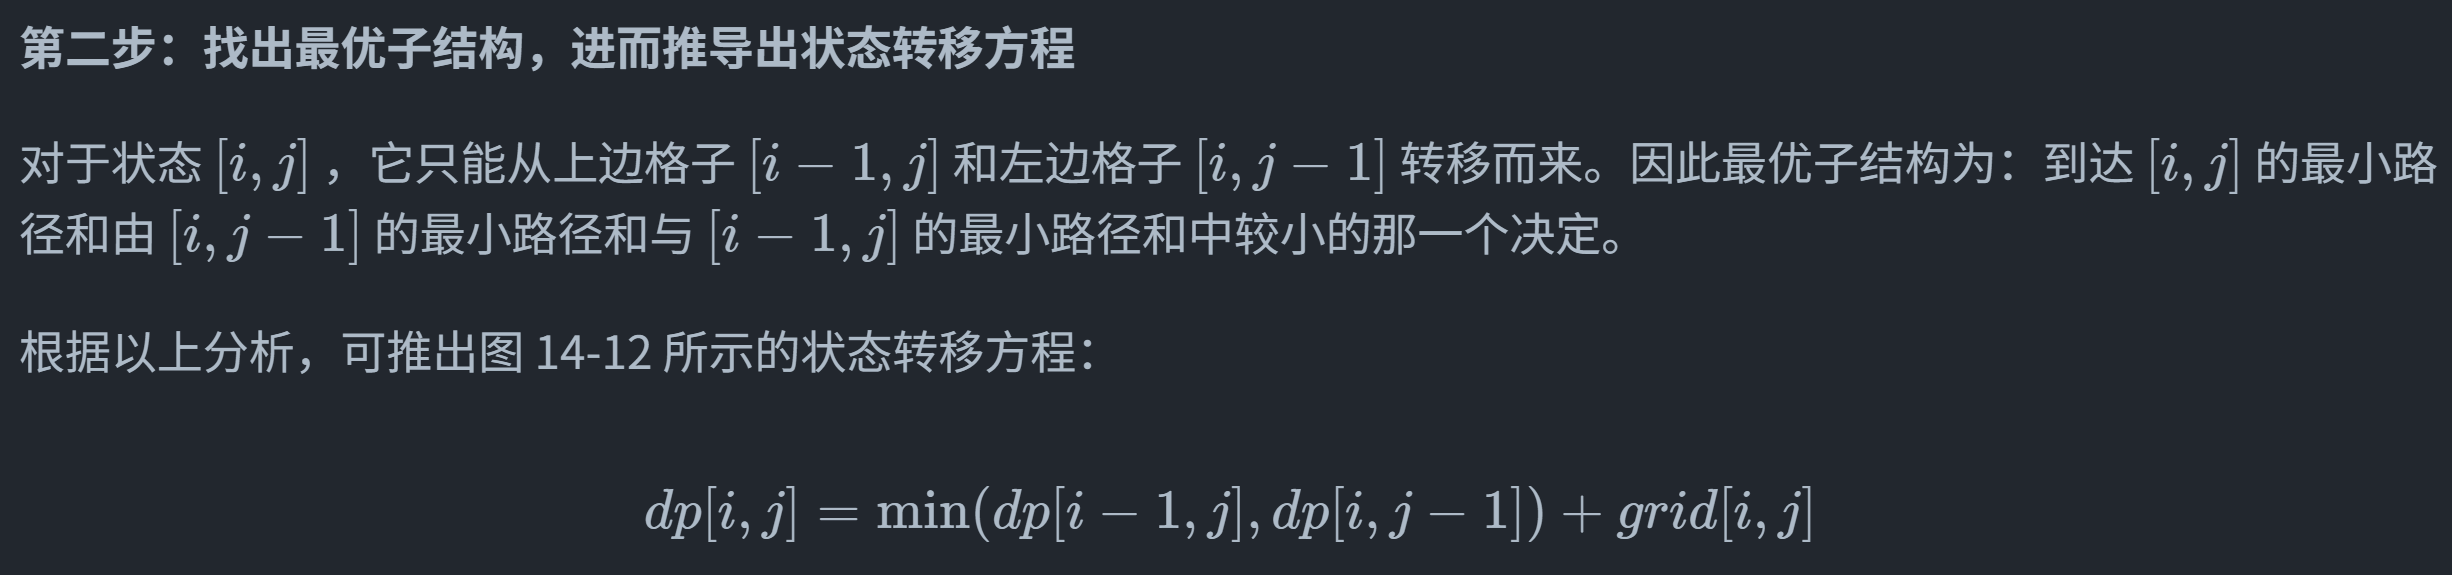
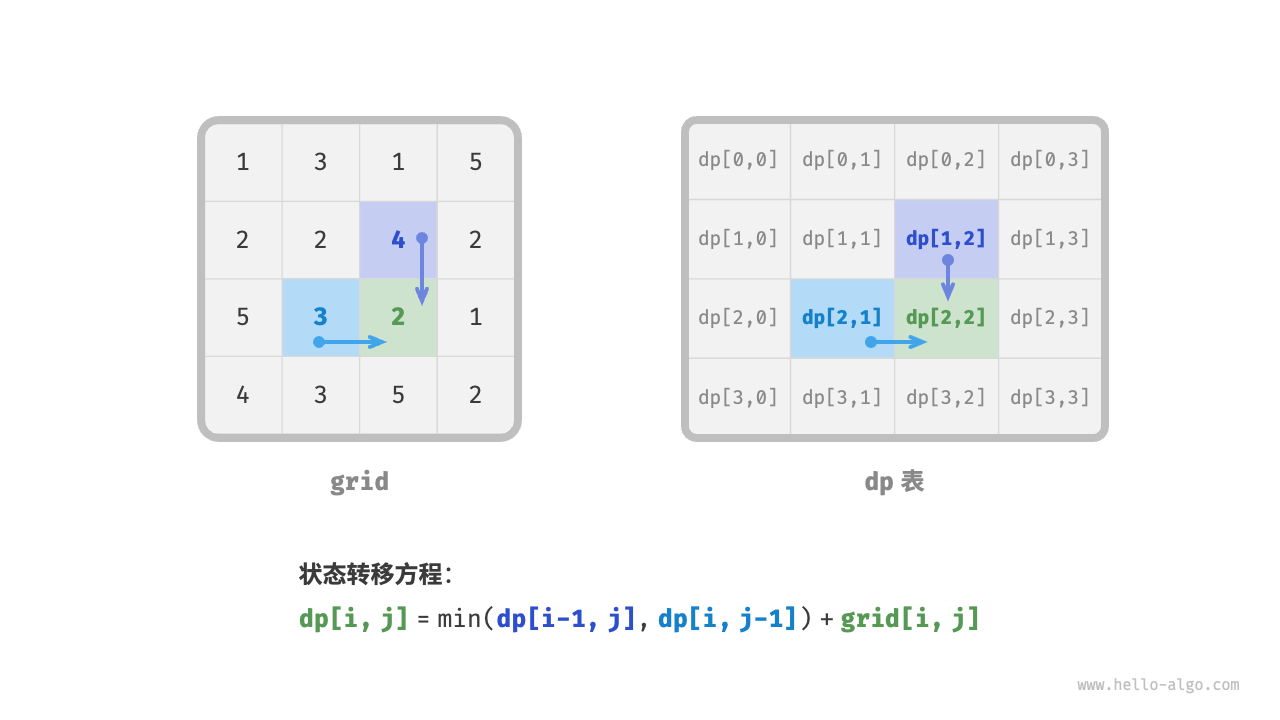
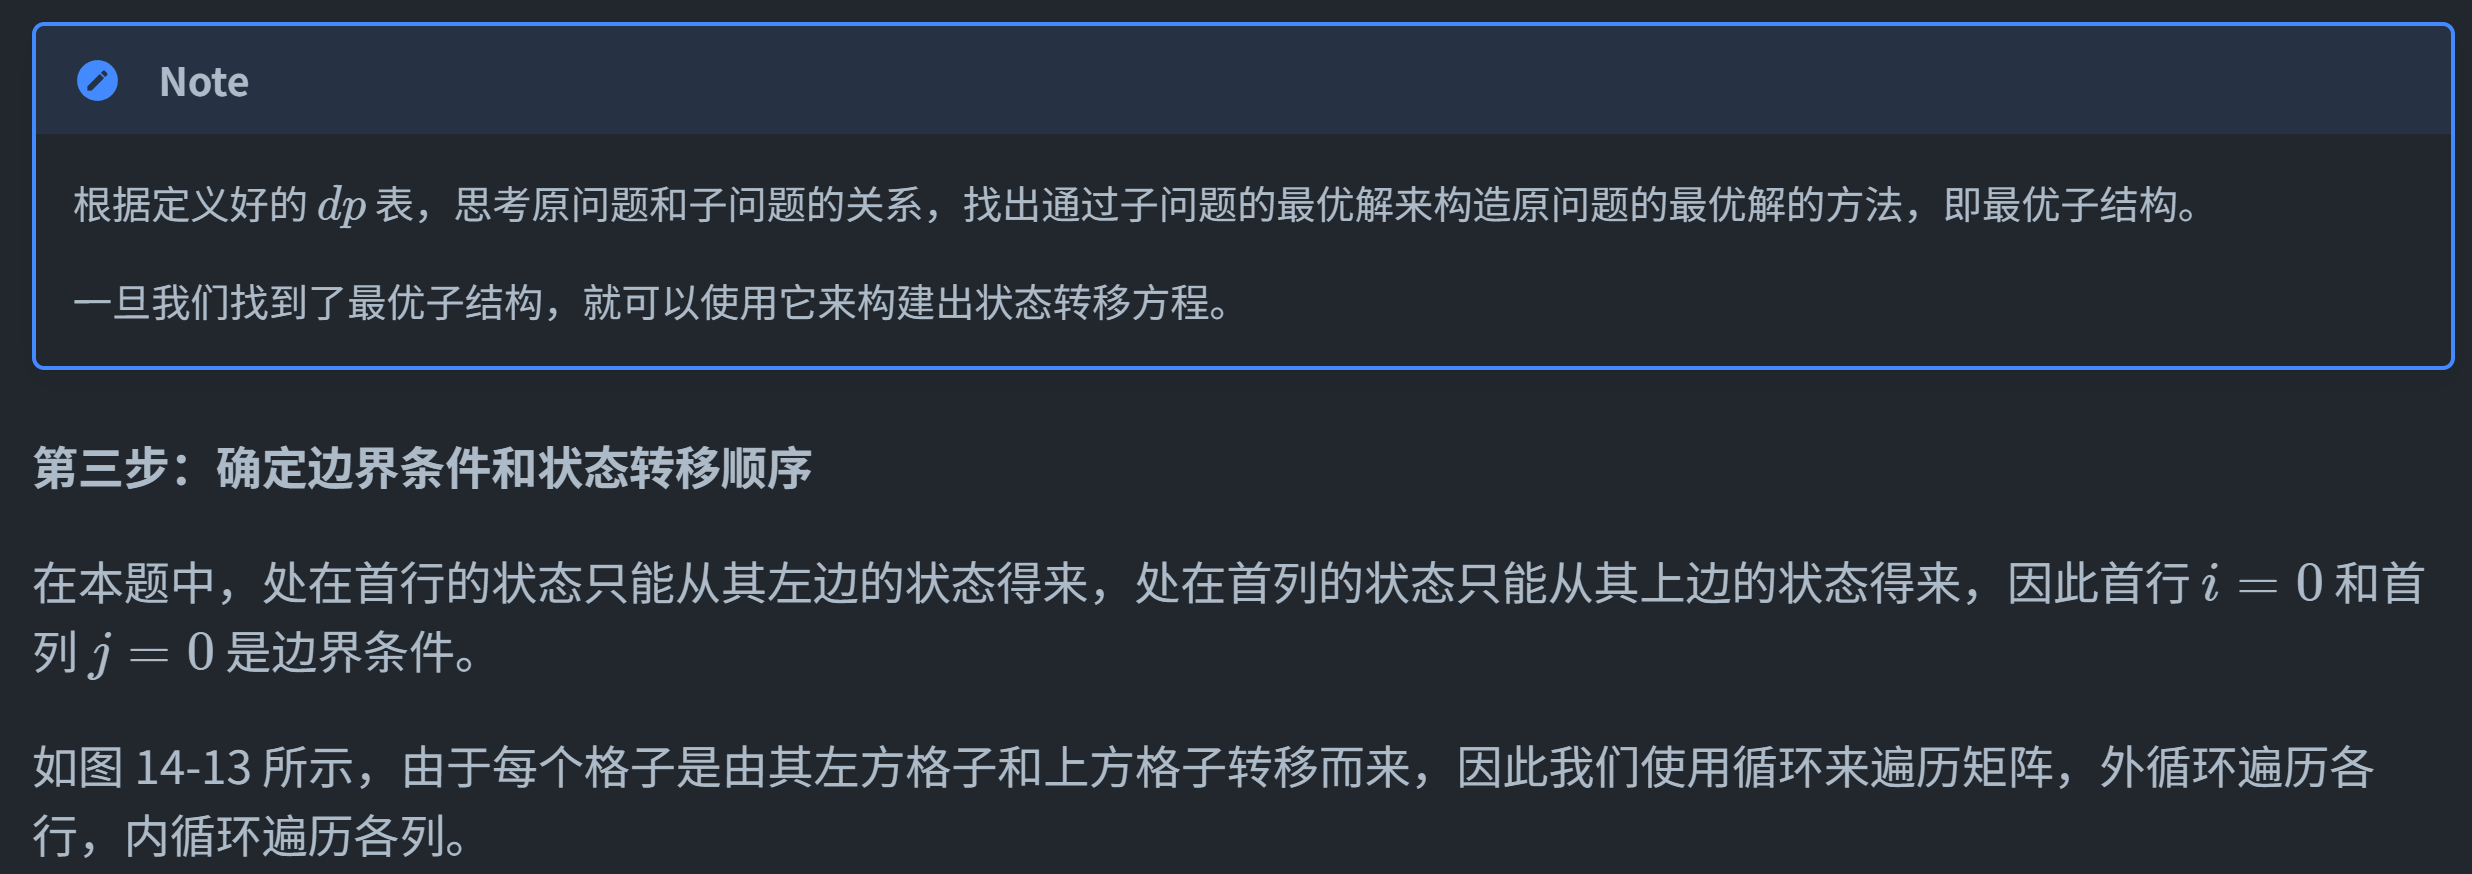
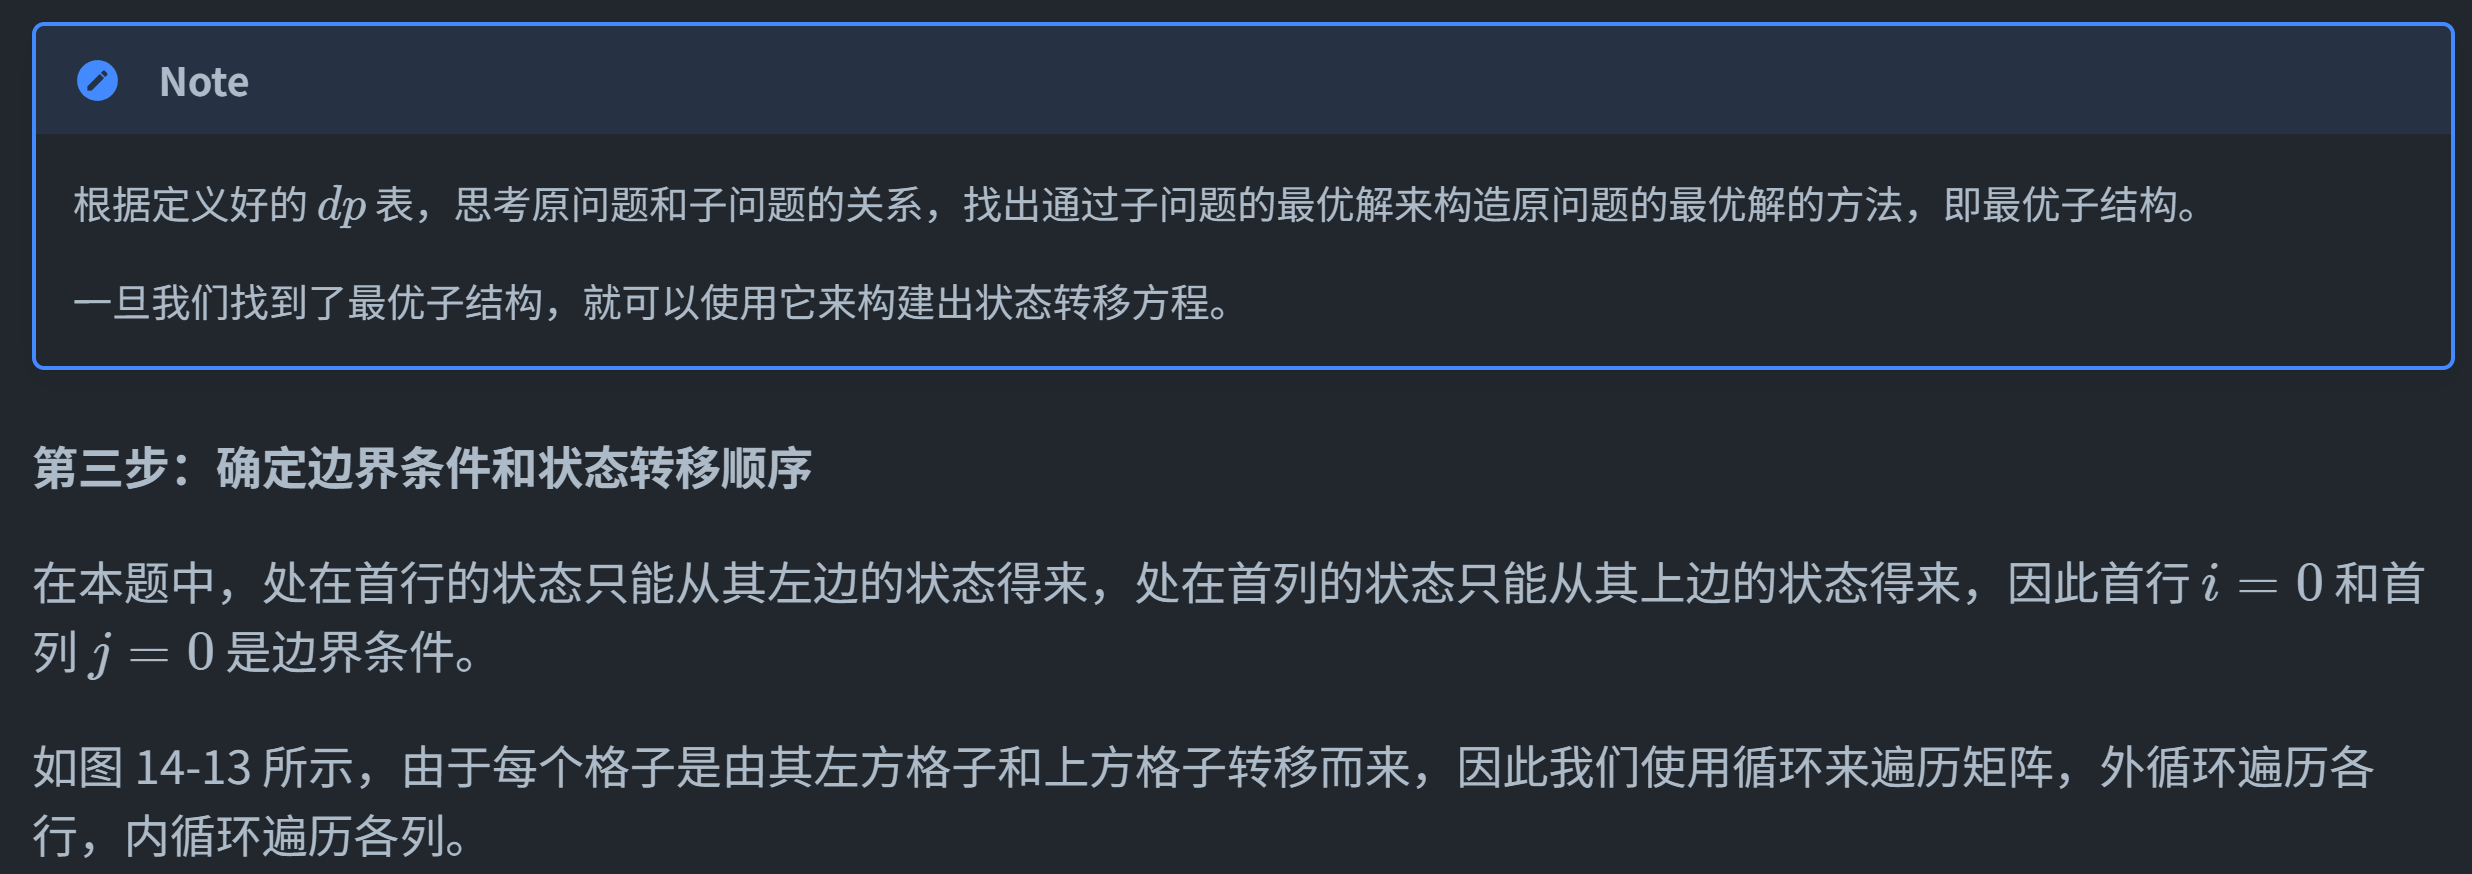
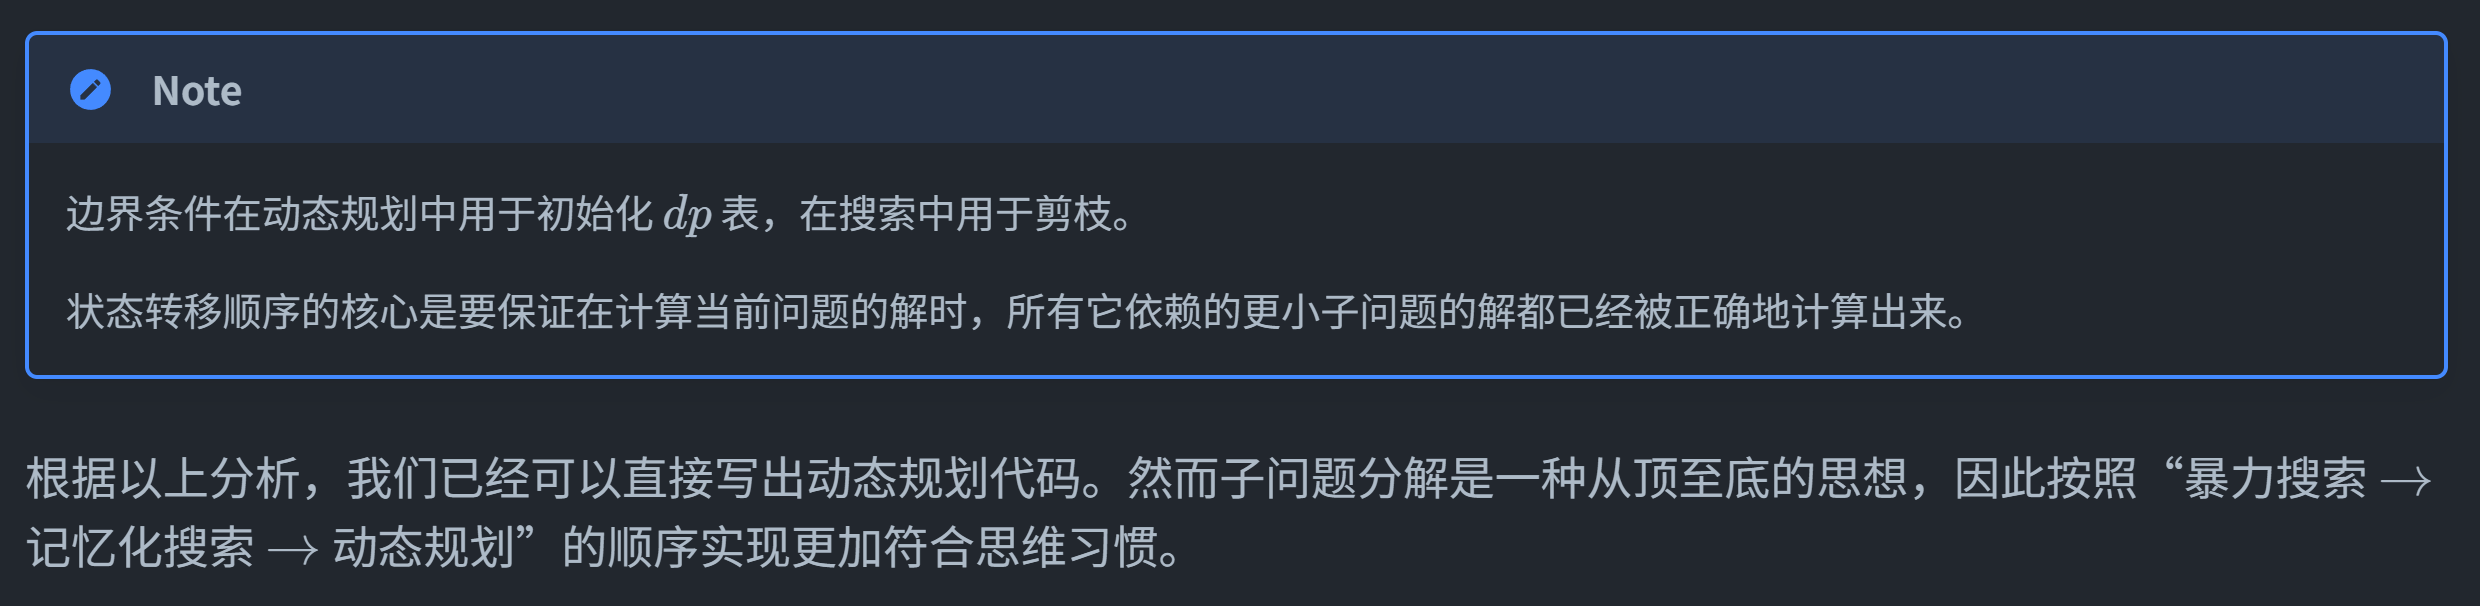
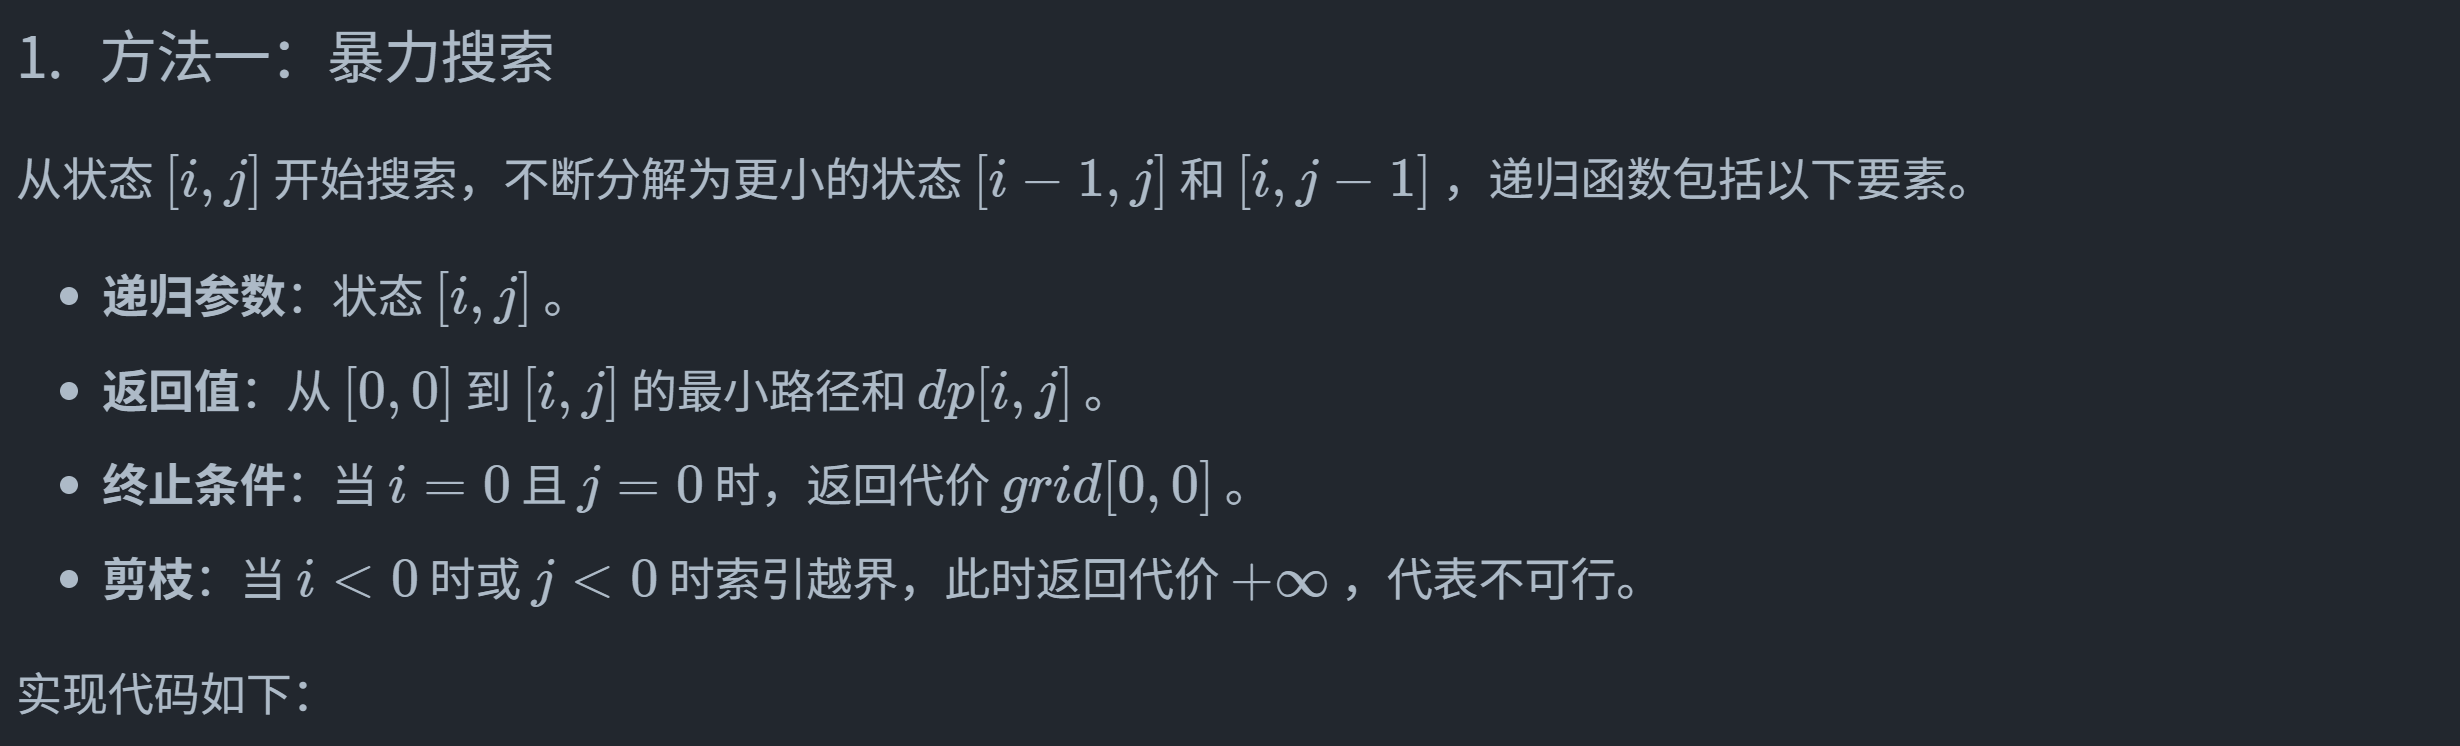

In [1]:
from math import inf

def min_path_sum_dfs(grid: list[list[int]], i: int, j: int) -> int:
    """最小路径和：暴力搜索"""
    # 若为左上角单元格，则终止搜索
    if i == 0 and j == 0:
        return grid[i][j]
    # 若行列索引越界，则返回 +∞ 代价
    if i < 0 or j < 0:
        return inf
    # 计算从左上角到 (i-1, j) 和 (i, j-1) 的最小路径代价
    up = min_path_sum_dfs(grid, i - 1, j)
    left = min_path_sum_dfs(grid, i, j - 1)
    # 返回从左上角到（i，j）的最小路径代价
    return min(left, up) + grid[i][j]    

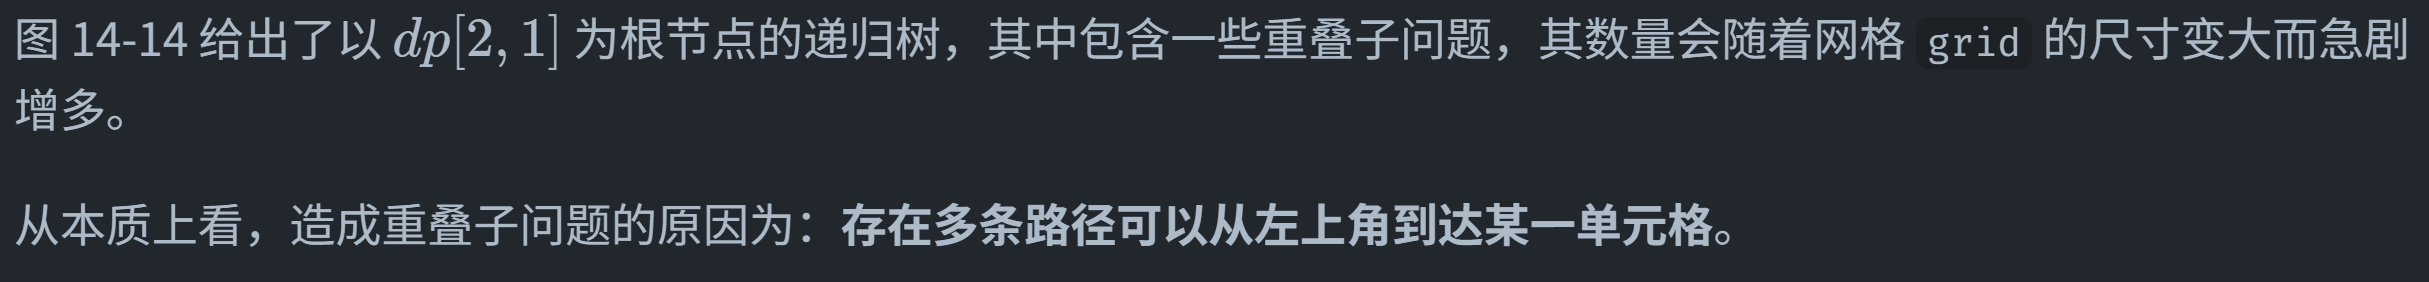
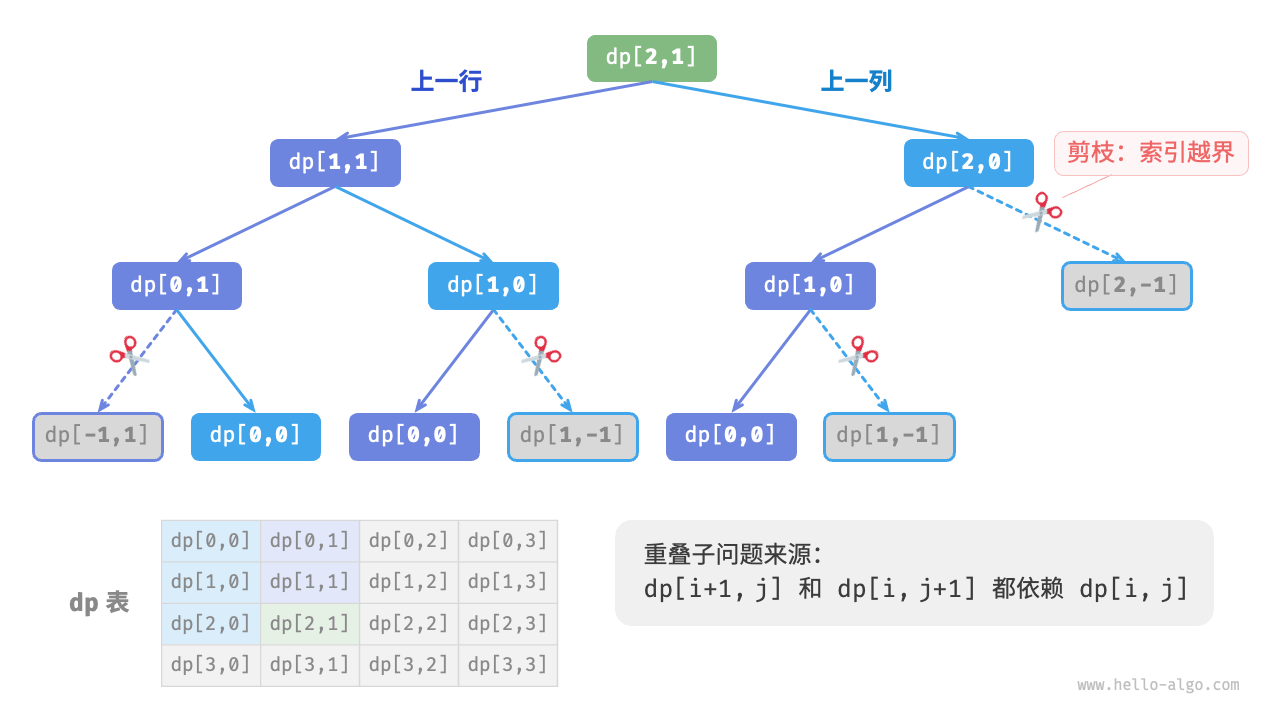
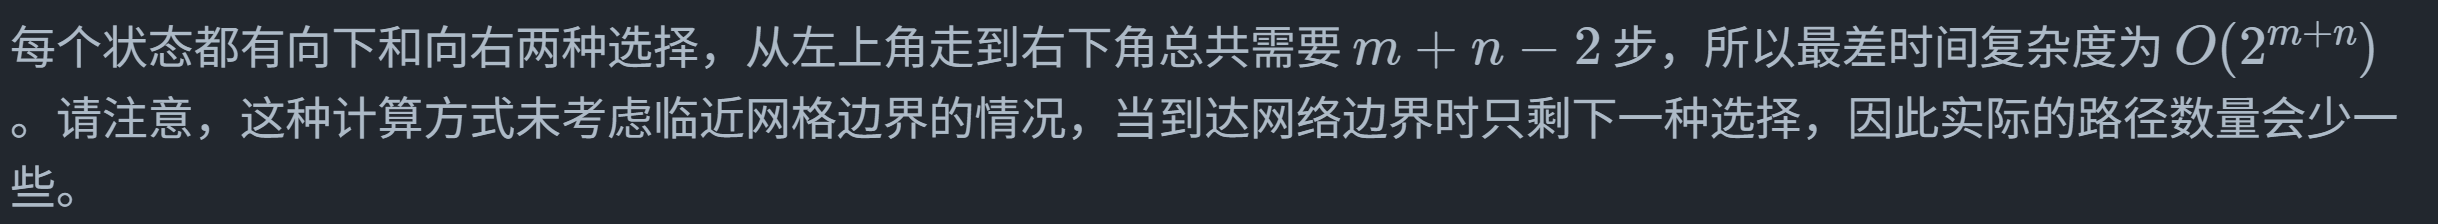
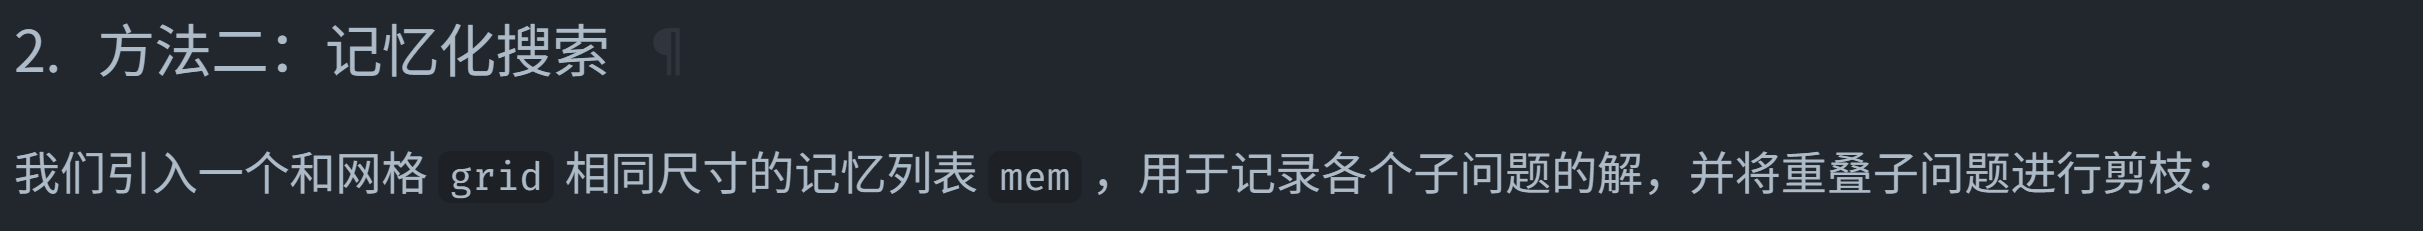

In [2]:
from math import inf


def min_path_sum_dfs_mem(grid: list[list[int]], mem: list[list[int]], i: int, j: int) -> int:
    """最小路径和：记忆化搜索"""
    # 若为左上角单元格，则终止搜索
    if i == 0 and j == 0:
        return grid[0][0]
    # 若行列索引越界，则返回 +∞ 代价
    if i < 0 or j < 0:
        return inf
    # 若已有记录，则直接返回
    if mem[i][j] != -1:
        return mem[i][j]
    # 左上角和上边单元格的最小路径代价
    up = min_path_sum_dfs_mem(grid, mem, i - 1, j)
    left = min_path_sum_dfs_mem(grid, mem, i, j - 1)
    # 记录并返回左上角到 (i, j) 的最小路径代价
    mem[i][j] = min(up, left) + grid[i][j]
    return mem[i][j]

In [3]:
"""Driver Code"""
if __name__ == "__main__":
    grid = [[1, 3, 1, 5], [2, 2, 4, 2], [5, 3, 2, 1], [4, 3, 5, 2]]
    n, m = len(grid), len(grid[0])

   # 记忆化搜索
    mem = [[-1] * m for _ in range(n)]
    res = min_path_sum_dfs_mem(grid, mem, n - 1, m - 1)
    print(f"从左上角到右下角的做小路径和为 {res}")

从左上角到右下角的做小路径和为 13


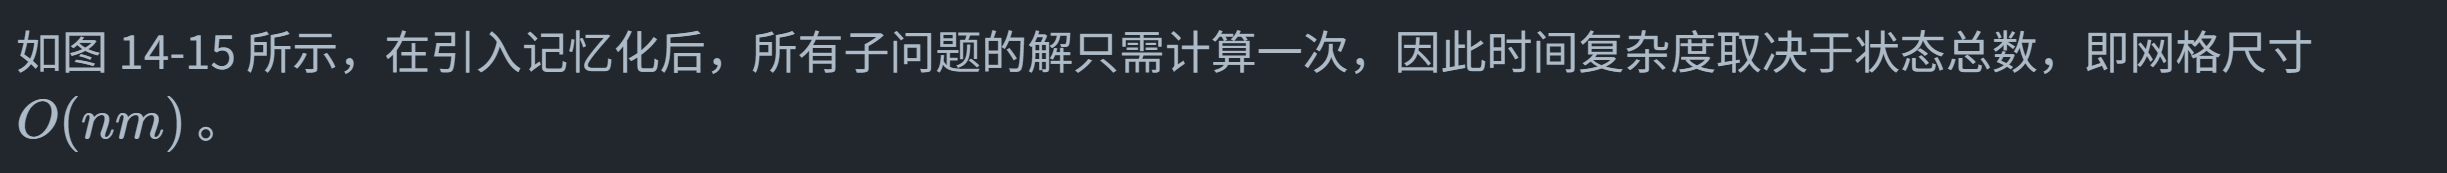
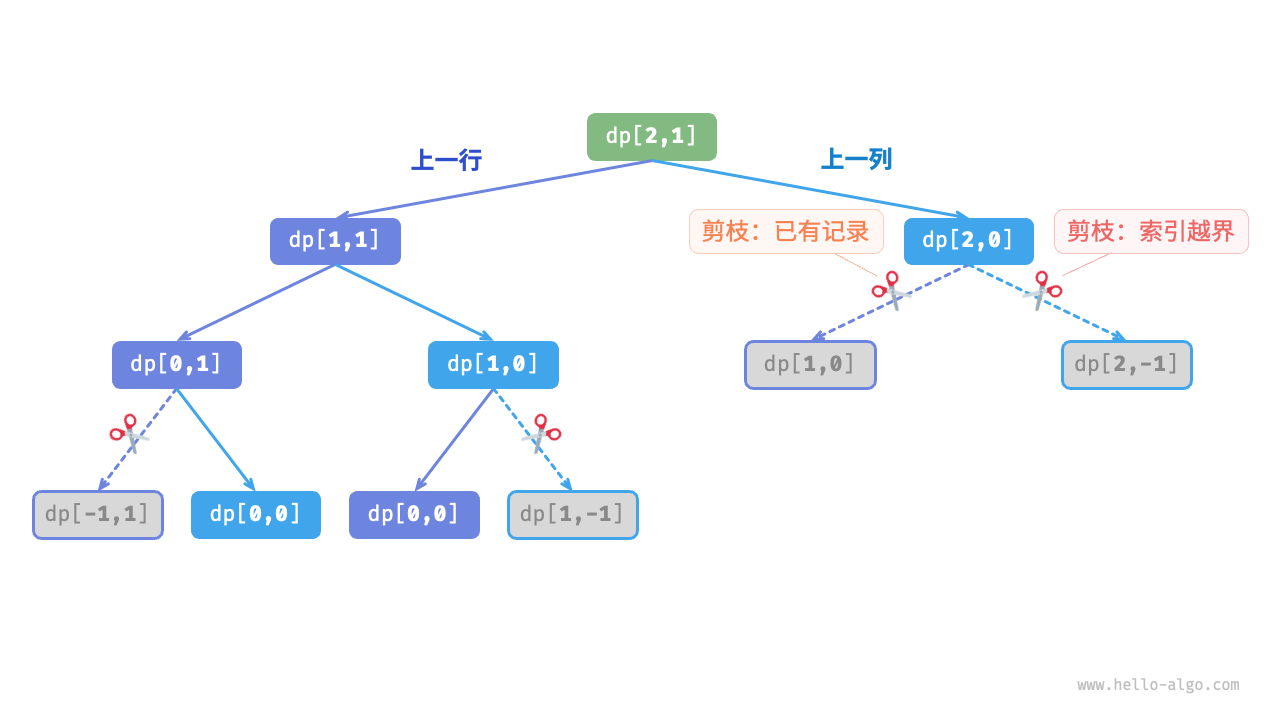
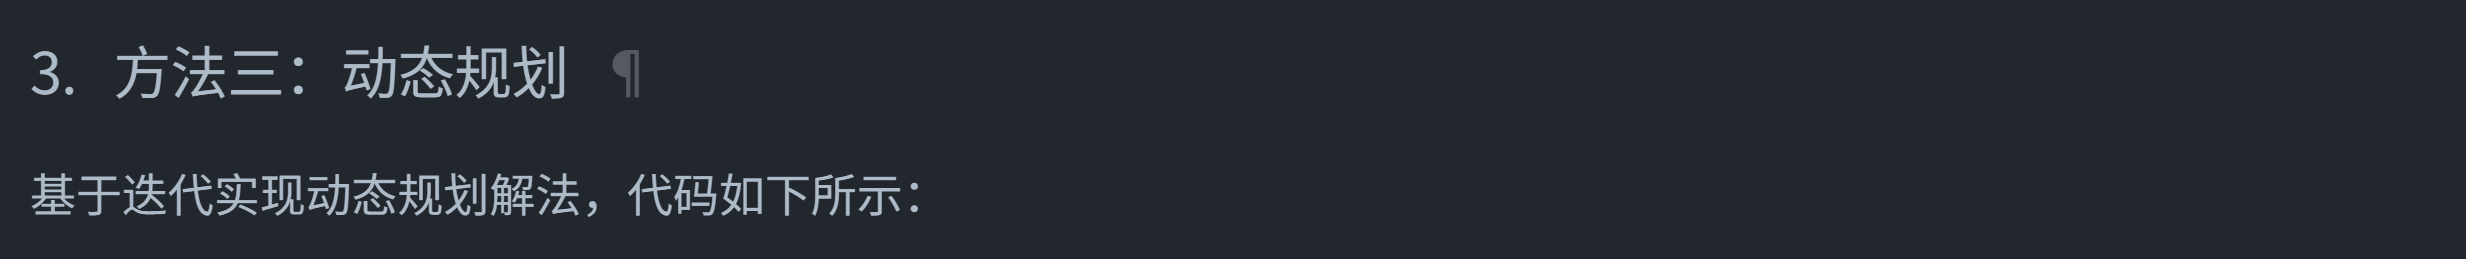

In [4]:
def min_path_sum_dp(grid: list[list[int]]) -> int:
    """最小路径和: 动态规划"""
    # n 记录行数 , 记录列数
    n, m = len(grid), len(grid[0]) 
    # 初始化 dp 表
    dp = [[0] * m for _ in range(n)]
    dp[0][0] = grid[0][0]
    # 状态转移：首行
    for j in range(1, m):
        dp[0][j] = dp[0][j - 1] + grid[0][j]
    # 状态转移：首列
    for i in range(1, n):
        dp[i][0] = dp[i - 1][0] + grid[i][0]
    # 状态转移：其余行和列
    for i in range(1, n):
        for j in range(1, m):
            dp[i][j] = min(dp[i - 1][j], dp[i][j - 1]) + grid[i][j]
    return dp[n - 1][m - 1]

In [5]:
"""Driver Code"""
if __name__ == "__main__":
    grid = [[1, 3, 1, 5], [2, 2, 4, 2], [5, 3, 2, 1], [4, 3, 5, 2]]
    n, m = len(grid), len(grid[0])

    # 动态规划
    res = min_path_sum_dp(grid)
    print(f"从左上角到右下角的做小路径和为 {res}")

从左上角到右下角的做小路径和为 13


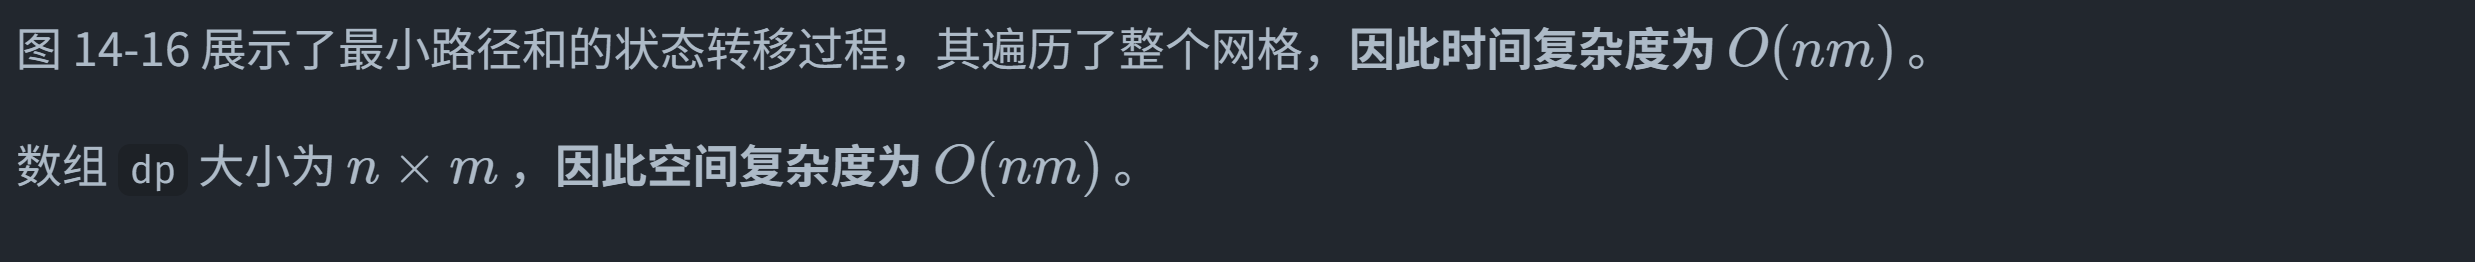
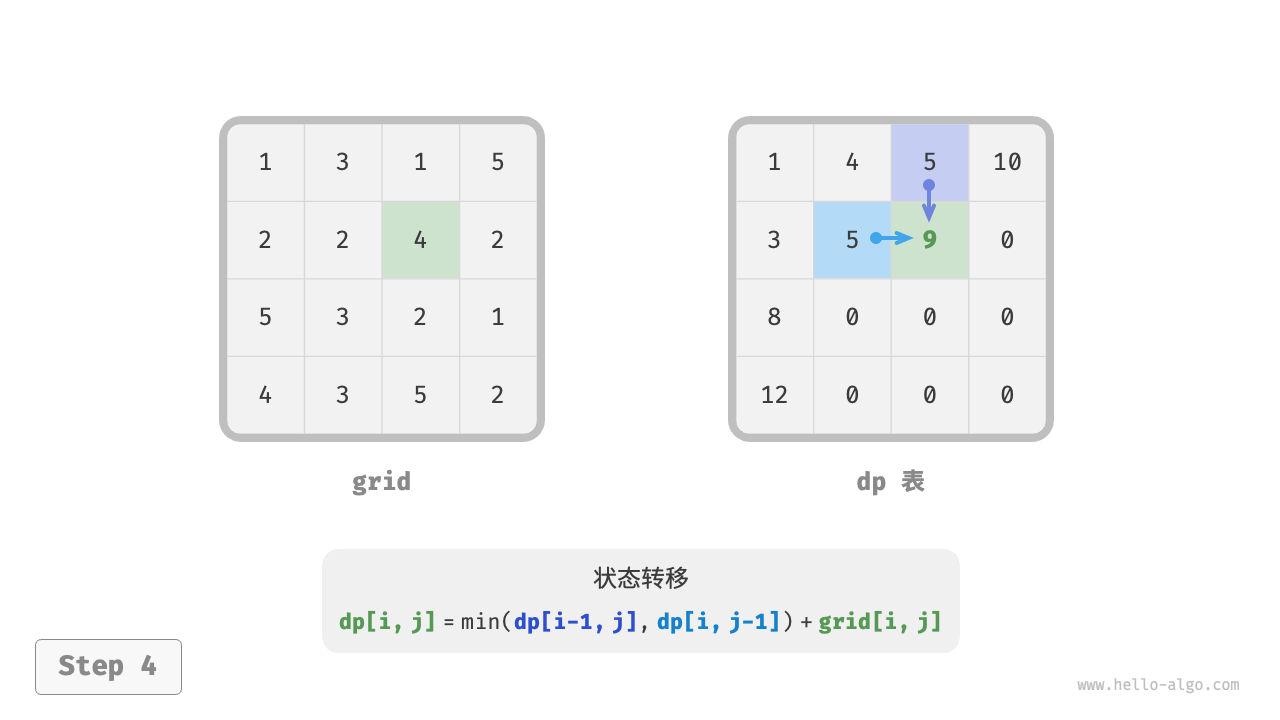
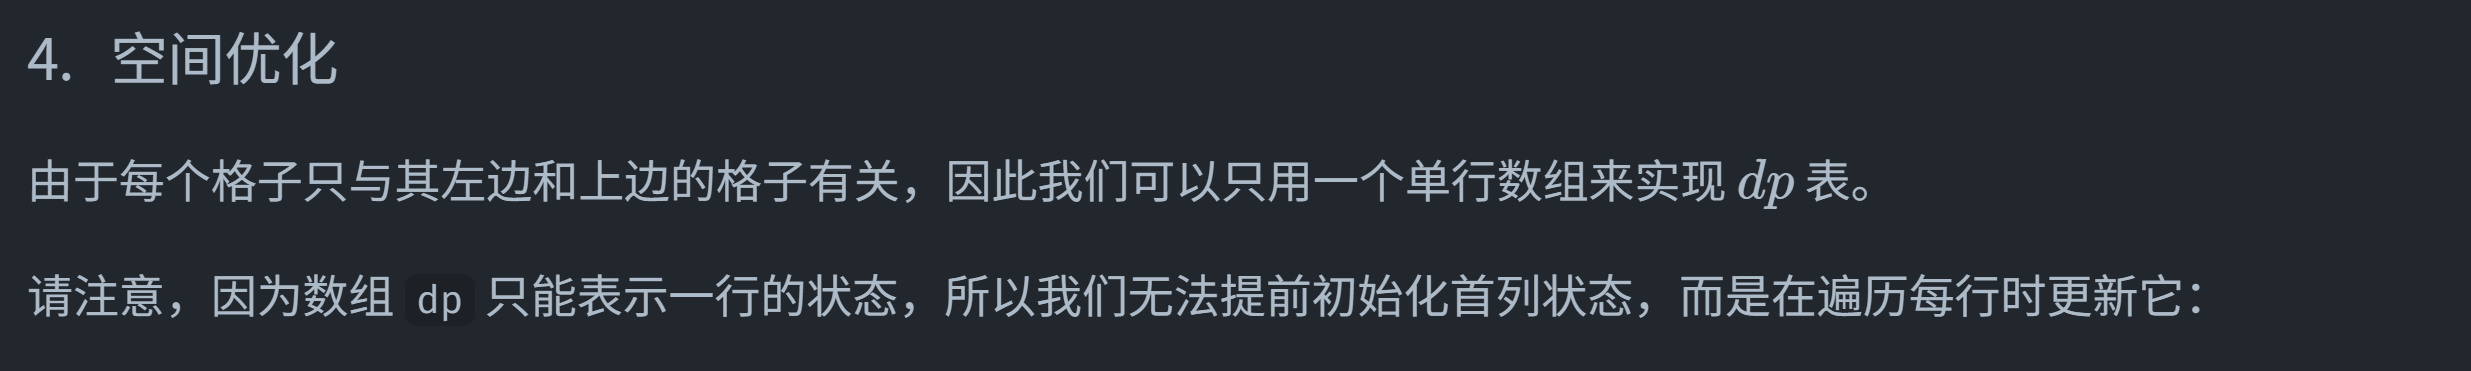

In [6]:
def min_path_sum_dp_comp(grid: list[list[int]]) -> int:
    """最小路径和：空间优化后的动态规划"""
    n, m = len(grid), len(grid[0])
    # 初始化 dp 表
    dp = [0] * m
    # 状态转移：首行
    dp[0] = grid[0][0]
    for j in range(1, m):
        dp[j] = dp[j - 1] + grid[0][j]
    # 状态转移：其余行
    for i in range(1, n):
        # 状态转移：首列
        dp[0] = dp[0] + grid[i][0]
        # 状态转移：其余列
        for j in range(1, m):
            dp[j] = min(dp[j - 1], dp[j]) + grid[i][j]
    return dp[m - 1]